In [1]:
import pandas as pd
import numpy as np

import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

import copy

In [2]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

In [3]:
COLUMN_NAME = ['Lunch_1', 'Cal_lunch_1', 'Lunch_2', 'Cal_lunch_2', \
                   'Dinner_1', 'Cal_dinner_1', 'Dinner_2', 'Cal_dinner_2']
DATA_LABELS = {1:2,2:0,5:1,6:0}

## 0. 다운로드한 파일들에서 필요한 내용들만 정제

In [76]:
df_all = pd.DataFrame(columns=COLUMN_NAME)
for n in range(37):
    df = pd.read_csv(f'haksik_dataset/noname({n+1}).csv', \
                     encoding='cp949', index_col=0).reset_index()

    date_l = []
    for i in range(5):
        date = dt.datetime.strptime('2023'+df.columns[i+2][4:9], '%Y%m/%d').date()
        date_l.append(date)
        
    rdf = []
    for j in [0,8]:
        for i in [1,2,5,6]:
            sub_df = df.iloc[i+j-1, DATA_LABELS[i]: DATA_LABELS[i] + 5]
            sub_df.index = date_l
            rdf.append(sub_df)

    rdf = pd.concat(rdf, axis=1)
    rdf.columns = COLUMN_NAME
    df_all = pd.concat([df_all, rdf], axis=0)

In [77]:
for i in [1,3,5,7]:
    df_all.iloc[:,i] = df_all.iloc[:,i].apply(lambda x: x[:-4]).astype(int)
df_all

,Lunch_1,Cal_lunch_1,Lunch_2,Cal_lunch_2,Dinner_1,Cal_dinner_1,Dinner_2,Cal_dinner_2
2023-02-13,함박스테이크\n통살새우가스\n야채샐러드\n단무지\n요구르트,740,들깨미역국\n통살새우가스\n해물볶음우동\n브로콜리참깨소스무침\n김치\n요구르트,780,닭갈비야채덮밥\n마카로니샐러드\n단무지,750,감자다시마국\n덝걸바야채볶음\n마카로니샐러드\n청경채굴소스볶음\n김치\n황도,720
2023-02-14,사천짜장덮밥\n만두탕수\n단무지,810,사천짜장덮밥\n꿔바로우탕수\n해파리냉채\n단무지\n계란국\n파인애플,760,토마토파스타\n마늘빵\n피클,830,(뚝)소고기우거지탕\n제육볶음\n양장피냉채\n감자샐러드\n깍두기,740
2023-02-15,돼지고기김치찌개\n스크램블에그\n도시락김,780,소고기무국\n순대야채볶음\n스크램블에그\n콩나물무침\n도시락김\n김치,750,치킨하이라이스\n생선까스\n단무지,720,배추된장국\n돈사태떡낌\n생선까스\n참나물무침\n깍두기\n쥬시쿨,740
2023-02-16,마파두부덮밥\n야채고로케*케찹\n단무지,720,얼갈이된장국\n데리야끼파닭\n마파두부\n미트무초절이\n김치\n약과,860,오므라이스\n그릴소시지\n오렌지주스\n단무지,720,섞어찌개\n소불고기볶음\n연근샐러드\n건파래볶음\n김치\n오렌지주스,760
2023-02-17,치즈등심돈까스\n양송이스프\n양상추샐러드\n단무지,780,청양초콩나물국\n훈제오리볶음\n연근조림\n상추겉절이\n단호박샐러드\n김치,720,제육야채덮밥\n숙주나물무침\n깍두기,780,오둠어묵탕\n고등어구이\n연두부양념장\n오이양파무침\n숙주무침\n깍두기,750
...,...,...,...,...,...,...,...,...
2023-11-06,돈육김치덮밥\n고로케*케찹\n단무지,960,물만둣국\n깐풍기\n잡채\n유부겨자무침\n도시락김\n깍두기,780,비빔면\n파채무침\n대패삼겹살\n단무지,860,부대찌개\n간장찜닭\n우거지된장지짐\n멸치견과류조림\n미역줄기볶음\n깍두기,880
2023-11-07,치즈등심돈까스\n요구르트\n야채샐러드\n단무지,880,꼬치어묵탕\n제육야채볶음\n우엉조림\n얼갈이된장무침\n알타리\n요구르트,820,제육야채덮밥\n만두탕수\n단무지,860,사천짜장덮밥\n계란탕\n만두탕수\n해파리냉채\n짜사이무침,680
2023-11-08,마파두부덮밥\n닭강정\n깍두기,780,콩나물밥*양념장\n청국장찌개\n두부김치\n오징어브로콜리숙회\n깍두기\n파인애플,800,치킨데리야끼덮밥\n핫도그*케찹\n단무지,880,(뚝)소고기우거지탕\n가자미구이\n감자조림\n도토리묵야채무침\n김치,820
2023-11-09,가라아게카레덮밥\n인절미모닝빵\n깍두기,860,(뚝)북어국\n사채김치볶음\n가지무침\n깍두기\n인절미모닝빵,680,해물볶음우동\n타코야끼\n단무지\n요구르트,780,얼갈이된장국\n돈육김치볶음\n숙주나물\n타코야끼\n도라지오이무침\n알타리,760


In [78]:
df_all.to_csv('haksik_dataset/whole_data.csv', index=True)

## 1. 데이터 뜯어보기

In [4]:
def get_data() -> pd.DataFrame:
    tdf = pd.read_csv('haksik_dataset/whole_data.csv', \
                      dtype={COLUMN_NAME[i]:(int if i%2 else str) for i in range(8)})
    tdf.index = tdf['Unnamed: 0']; tdf.drop(['Unnamed: 0'], inplace=True, axis=1)
    tdf.rename_axis(None, inplace=True)
    return tdf

In [28]:
df_all = get_data()

In [29]:
lunch_main = df_all['Lunch_1'].apply(lambda x: x[:x.find('\n')])
dinner_main = df_all['Dinner_1'].apply(lambda x: x[:x.find('\n')])

main_menu = pd.DataFrame({'Menu':pd.concat([lunch_main, dinner_main]), \
                         'Calories':pd.concat([df_all['Cal_lunch_1'], df_all['Cal_dinner_1']]), \
                         'Is_lunch':[i < len(lunch_main) for i in range(370)]})
ORDER_0 = [i//2 if i%2==0 else i//2+185 for i in range(370)]
main_menu.reset_index(inplace=True)
main_menu = main_menu.reindex(ORDER_0)
main_menu = main_menu.rename({'index':'Date'}, axis=1)
main_menu.reset_index(inplace=True, drop=True)
main_menu

find_element = lambda x: main_menu[main_menu['Menu'] == x]

In [30]:
def menu_info():
    print(f"고유한 메뉴의 개수: {len(main_menu)-sum(main_menu['Menu'].duplicated())}")
    print(f"중복해서 나온 메뉴 비율: {sum(main_menu['Menu'].duplicated(keep=False))} / {len(main_menu)}")

menu_info()

고유한 메뉴의 개수: 99
중복해서 나온 메뉴 비율: 330 / 370


In [31]:
main_menu['Menu'].unique()

array(['함박스테이크', '닭갈비야채덮밥', '사천짜장덮밥', '토마토파스타', '돼지고기김치찌개', '치킨하이라이스',
       '마파두부덮밥', '오므라이스', '치즈등심돈까스', '제육야채덮밥', '육개장', '가라아게카레덮밥',
       '돈육김치덮밥', '(뚝)소고기우거지해장국', '치즈등심돈가스', '가라아게동', '잡채덮밥', '돈육카레라이스',
       '삼일', '치즈돈까스', '바지락순두부찌개', '가츠동', '등심돈까스', '스팸김치덮밥', '소고기우거지탕',
       '치킨까스', '마늘쫑돼지고기덮밥', '떡볶이', '카레라이스', '제육김치야채덮밥', '부대찌개너비아니구이',
       '필라프', '볶음우동', '소고기장터국밥', '부대찌개', '오삼야채덮밥', '소고기버섯불고기덮밥', '유부멸치국수',
       '스팸기치덮밥', '단호박카레라이스', '육개장칼국수', '콩불비빔밥', '짜장덮밥', '(뚝)소고기우거지탕',
       '해물순두부찌개', '치킨데리야끼덮밥', '불고기야채덮밥', '(뚝)육개장', '대만식돼지고기덮밥', '황태콩나물국',
       '돈육김치찌개', '어린이날', '햄야채볶음밥', '스팸도시락비빔밥', '데리야끼덮밥', '오삼불고기덮밥', '라볶이',
       '잔치국수', '카레필라프', '치킨스테이크', '제육김치덮밥', '해물순두두찌개*만두사리', '휴', '김밥볶음밥',
       '부대김치덮밥', '치킨마요덮밥', '사천짜장밥', '제육야채볶음', '파스타', '버섯불고기덮밥', '대패삼겹덮밥',
       '소고기당면덮밥', '가라아게타레덮밥', '해물볶음우동', '김치말이국수', '순두부찌개', '치킨데리야채덮밥',
       '(뚝)우거지해장국', '지코바치밥', '소보로덮밥', '닭갈비덮밥', '운영없', '광복', '(뚝)북어콩나물국',
       '소고기국밥', '소고기야채덮밥', '사천짜장면', '추석연', '임시공휴', '개천', '스파이시치킨

### 1-1. 오타, 휴무일 제거

In [32]:
# (뚝) 제거
# 삼일 어린이날 휴 운영없 광복 추석연 임시공휴 개천 한글 [개교기념일특식] 개교기념 제거
# 스팸기치덮밥 해물순두두찌개*만두사리 대체

main_menu.drop(main_menu[main_menu['Menu'].\
isin('삼일 어린이날 휴 운영없 광복 추석연 임시공휴 개천 한글 [개교기념일특식] 개교기념'.split(' '))].index \
              , inplace=True)

main_menu['Menu'] = main_menu['Menu'].apply(lambda x: x if x.find('(뚝)') == -1 else x[3:])
len(main_menu['Menu'].unique())
main_menu['Date'] = pd.to_datetime(main_menu['Date'])

main_menu.replace('해물순두두찌개*만두사리', '해물순두부찌개', inplace=True)
main_menu.replace('스팸기치덮밥', '스팸김치덮밥',inplace=True)
main_menu.replace('가라아게타레덮밥', '가라아게카레덮밥',inplace=True)
main_menu.replace('치킨데리야채덮밥', '치킨데리야끼덮밥',inplace=True)
main_menu.replace('단호박카레라이스', '카레라이스',inplace=True)
main_menu.replace('소고기국밥', '소고기장터국밥',inplace=True)
main_menu.replace('돈육김치찌개', '돼지고기김치찌개',inplace=True)
main_menu.replace('부대찌개너비아니구이', '부대찌개',inplace=True)
main_menu.replace('해물순두부찌개', '순두부찌개',inplace=True)
main_menu.replace('바지락순두부찌개', '순두부찌개',inplace=True)
main_menu.replace('데리야끼덮밥', '치킨데리야끼덮밥',inplace=True)
main_menu.replace('소고기우거지해장국', '소고기우거지탕',inplace=True)
main_menu.replace('소고기야채덮밥', '소고기덮밥',inplace=True)
main_menu.replace('소고기버섯불고기덮밥', '소고기덮밥',inplace=True)
main_menu.replace('소고기당면덮밥', '소고기덮밥',inplace=True)
main_menu.replace('카레필라프', '필라프',inplace=True)
main_menu.replace('치즈등심돈가스', '치즈등심돈까스',inplace=True)
main_menu.replace('치즈돈까스', '치즈등심돈까스',inplace=True)
main_menu.replace('제육김치야채덮밥', '제육김치덮밥',inplace=True)
main_menu.replace('돈육카레라이스', '카레라이스',inplace=True)
main_menu.loc[main_menu['Menu'].str.contains('불고기'),'Menu'] = '불고기덮밥'

main_menu.reset_index(inplace=True, drop=True)

In [33]:
menu_info()

고유한 메뉴의 개수: 64
중복해서 나온 메뉴 비율: 322 / 344


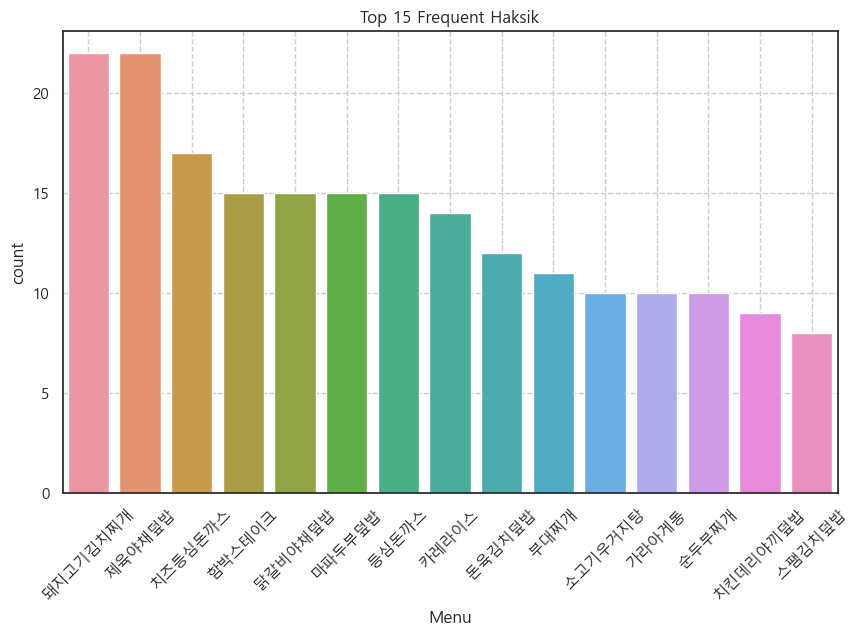

In [34]:
filtered_df = main_menu[main_menu['Menu'].isin(main_menu['Menu'].value_counts().nlargest(15).index)]

plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.countplot(x='Menu', data=filtered_df, order=filtered_df['Menu'].value_counts().index)
plt.title("Top 15 Frequent Haksik")
plt.grid(linestyle='--')

In [35]:
main_menu['Menu'].value_counts().value_counts().sort_index(ascending=False)

count
22     2
17     1
15     4
14     1
12     1
11     1
10     3
9      1
8      3
7      4
6      4
5      2
4      2
3      5
2      8
1     22
Name: count, dtype: int64

In [36]:
main_menu

,Date,Menu,Calories,Is_lunch
0,2023-02-13,함박스테이크,740,True
1,2023-02-13,닭갈비야채덮밥,750,False
2,2023-02-14,사천짜장덮밥,810,True
3,2023-02-14,토마토파스타,830,False
4,2023-02-15,돼지고기김치찌개,780,True
...,...,...,...,...
339,2023-11-08,치킨데리야끼덮밥,880,False
340,2023-11-09,가라아게카레덮밥,860,True
341,2023-11-09,해물볶음우동,780,False
342,2023-11-10,유부잔치국수,840,True


In [37]:
val_count = main_menu['Menu'].value_counts()
other_menus = val_count[val_count <= 2].index.values

In [43]:
type(val_count)

pandas.core.series.Series

In [45]:
cat_int = copy.deepcopy(val_count)
for i in range(len(cat_int)):
    cat_int[i] = 0 if cat_int.index.values[i] in other_menus else (i+1)

In [46]:
cat_int

Menu
제육야채덮밥       1
돼지고기김치찌개     2
치즈등심돈까스      3
마파두부덮밥       4
닭갈비야채덮밥      5
            ..
스팸도시락비빔밥     0
햄야채볶음밥       0
대만식돼지고기덮밥    0
떡볶이          0
유부잔치국수       0
Name: count, Length: 64, dtype: int64

In [38]:
df_all = copy.deepcopy(main_menu)
df_all['Menu_modified'] = df_all['Menu']
df_all.loc[df_all['Menu_modified'].isin(other_menus), 'Menu_modified'] = '기타'
df_all = pd.get_dummies(df_all, columns=['Menu_modified'], prefix=['Menu'])
df_all['Index'] = df_all.index.values
df_all['Date_delta'] = (df_all['Date'] - df_all['Date'].iloc[0]).dt.days
df_all

,Date,Menu,Calories,Is_lunch,Menu_가라아게동,Menu_가라아게카레덮밥,Menu_가츠동,Menu_기타,Menu_닭갈비야채덮밥,Menu_돈육김치덮밥,...,Menu_치킨데리야끼덮밥,Menu_치킨스테이크,Menu_치킨하이라이스,Menu_카레라이스,Menu_토마토파스타,Menu_파스타,Menu_필라프,Menu_함박스테이크,Index,Date_delta
0,2023-02-13,함박스테이크,740,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,0,0
1,2023-02-13,닭갈비야채덮밥,750,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,1,0
2,2023-02-14,사천짜장덮밥,810,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,1
3,2023-02-14,토마토파스타,830,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,3,1
4,2023-02-15,돼지고기김치찌개,780,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,2023-11-08,치킨데리야끼덮밥,880,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,339,268
340,2023-11-09,가라아게카레덮밥,860,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,340,269
341,2023-11-09,해물볶음우동,780,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,341,269
342,2023-11-10,유부잔치국수,840,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,342,270


In [39]:
main_menu.loc[main_menu['Menu'].str.contains('찌개'),:]

,Date,Menu,Calories,Is_lunch
4,2023-02-15,돼지고기김치찌개,780,True
18,2023-02-24,돼지고기김치찌개,780,True
20,2023-02-27,돼지고기김치찌개,740,True
27,2023-03-03,순두부찌개,780,False
36,2023-03-10,순두부찌개,780,True
40,2023-03-14,돼지고기김치찌개,810,True
45,2023-03-16,부대찌개,720,False
51,2023-03-21,돼지고기김치찌개,830,False
56,2023-03-24,부대찌개,780,True
60,2023-03-28,돼지고기김치찌개,810,True
